<a href="https://colab.research.google.com/github/Marcelo-Arce/Data-science-exercises/blob/main/Clasificador%20de%20prendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import tensorflow_datasets as tfds

data, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [17]:
#vemos la composición#
metadata



tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [18]:
#separamos los datos y verificamos los tipos de articulos, el cual nos suelta un indice
data_train, data_test = data['train'], data['test']
type_item = metadata.features['label'].names
type_item

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
#funcion para normalizar los datos de 0 a 255, donde 0 es negro y 255 es blanco en base a una relacion de 0 o 1.
def normalize(images, tags):
  images= tf.cast(images, tf.float32)
  images/=255 #aqui pasa de 0-255 a 0-1
  return images, tags

  #normalizamos la data_train y data_test con la funcion normalize de arriba

  data_train= data_train.map(normalize)
  data_test= data_test.map(normalize)

  #lo mandamos todo a memoria cache para que no sea tan lento
  data_train = data_train.cache()
  data_test = data_test.cache()
  

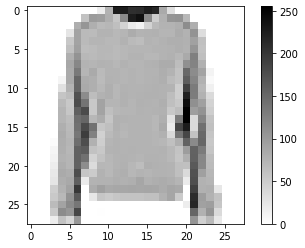

In [20]:
#visualizamos como se ve la imagen

for images, tags in data_train.take(1):
  break

images = images.numpy().reshape((28,28)) #usamos reshape para redimensionar la imagen

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(images, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


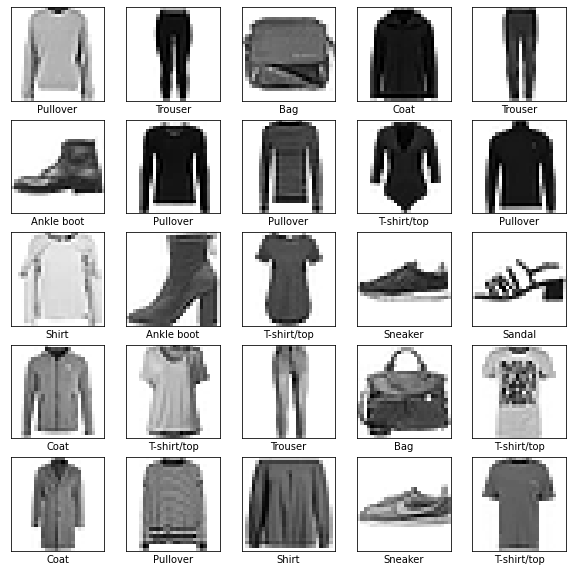

In [21]:
plt.figure(figsize=(10, 10))

for i,(images, tags) in enumerate(data_train.take(25)):
  images=images.numpy().reshape((28,28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images, cmap=plt.cm.binary)
  plt.xlabel(type_item[tags])
plt.show()

In [22]:
#creando el modelo
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),
  tf.keras.layers.Dense(50, activation= tf.nn.relu),
  tf.keras.layers.Dense(50, activation= tf.nn.relu),
  tf.keras.layers.Dense(10, activation= tf.nn.softmax)   
                          
                             
])

In [23]:
#compilando el modelo

model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [24]:
LOT_SIZE = 32

data_train = data_train.repeat().shuffle(60000).batch(LOT_SIZE)
data_test = data_test.batch(LOT_SIZE)



In [25]:
import math


historical = model.fit(data_train, epochs= 5, steps_per_epoch= math.ceil(60000/LOT_SIZE))

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 1.6497 - accuracy: 0.6907
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6917 - accuracy: 0.7599
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6589 - accuracy: 0.7770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6420 - accuracy: 0.7853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6117 - accuracy: 0.7968


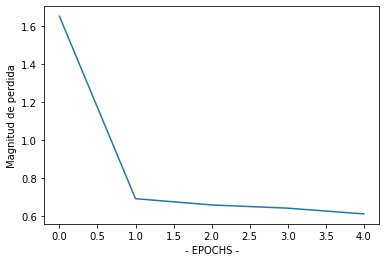

In [26]:
plt.xlabel("- EPOCHS -")
plt.ylabel("Magnitud de perdida")
plt.plot(historical.history["loss"])

         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


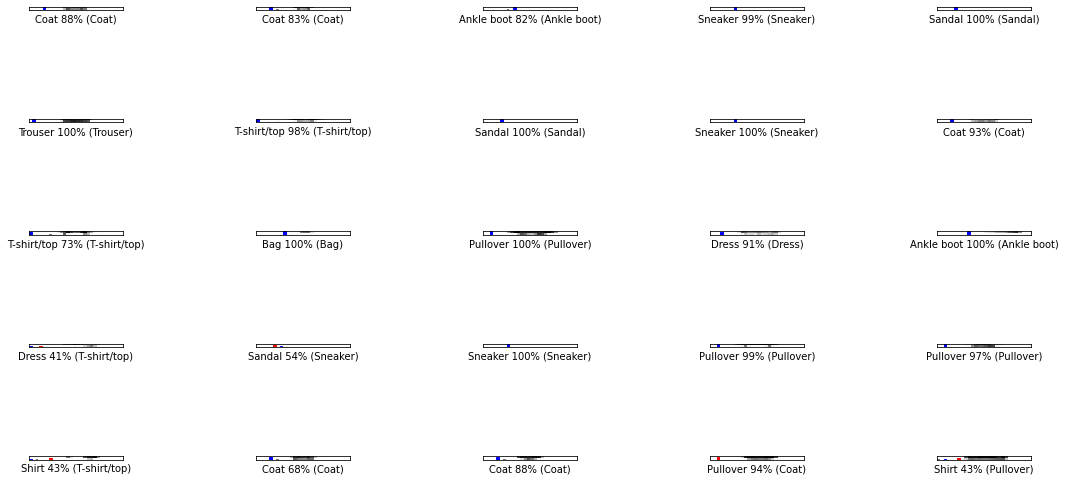

In [32]:
from matplotlib.backend_bases import GraphicsContextBase
from numpy.core.fromnumeric import argmax
import numpy as np
for images_test, tags_test in data_test.take(1):
  images_test = images_test.numpy()
  tags_test = tags_test.numpy()
  predictions = model.predict(images_test)

def graphics(i, arr_predictions, tags_real, images):
  arr_predictions, tags_real, img = arr_predictions[i], tags_real[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0],cmap=plt.cm.binary)

  tags_prediction = np.argmax(arr_predictions)
  if tags_prediction == tags_real:
    color= 'blue'#logrado
  else:
    color= 'red' #fallado
  plt.xlabel("{} {:2.0f}% ({})". format(
      type_item[tags_prediction],
      100*np.max(arr_predictions),
      type_item[tags_real],
      color=color
      ))
def graphic_valor_fix(i, arr_predictions, tags_real):
  arr_predictions, tags_real = arr_predictions[i], tags_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  graphic_action = plt.bar(range(10), arr_predictions, color='#777777')
  plt.ylim([0,1])
  tags_prediction= np.argmax(arr_predictions)

  graphic_action[tags_prediction].set_color('red')
  graphic_action[tags_real].set_color('blue')

files = 5
columns = 5
num_images = files * columns
plt.figure(figsize=(2*2*columns, 2*files))
for i in range(num_images):
  plt.subplot(files, 2*columns, 2*i+1)
  graphics(i, predictions, tags_test, images_test)
  plt.subplot(files, 2*columns, 2*i+1)
  graphic_valor_fix(i, predictions, tags_test)



                                                               

In [34]:
images = images_test[20]
images = np.array([images])
prediction = model.predict(images)

print("Prediction: " + type_item[np.argmax(prediction[0])] )

Prediction: Shirt
